# Diskreter harmonischer Oszillator als Realisierung von Blochwellen


## Created: RW, 8.3.20
## Revision: 
## Status: works

## Laden von notwendigen python Modulen

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import root
import scipy.constants as co

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 11,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

#%matplotlib inline - Figures are shown as static png images (optionally svg if configured)
%matplotlib notebook 
#or %matplotlib nbagg - Interactive Figures inside the notebook
# %matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)
#%matplotlib tk or 
#%matplotlib qt 
# etc. - GUI windows show the figure externally to the notebook with the given interactive backend

import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Definition der Systemmatrix

Erst für flache Potentiale $\Omega=1$

<IPython.core.display.Javascript object>


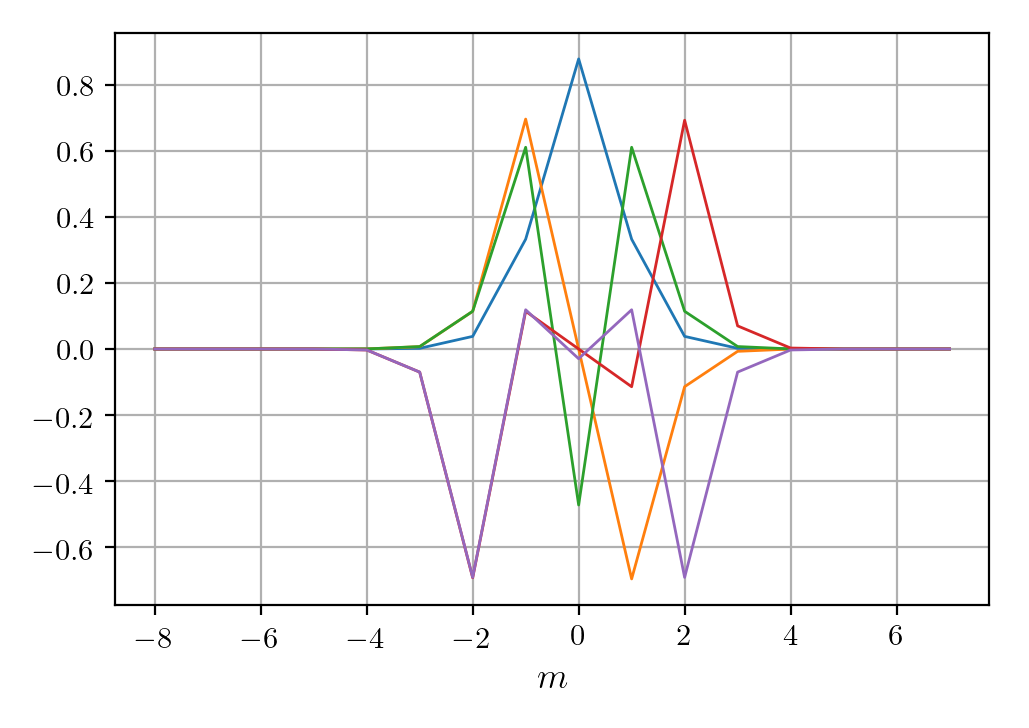

<IPython.core.display.Javascript object>


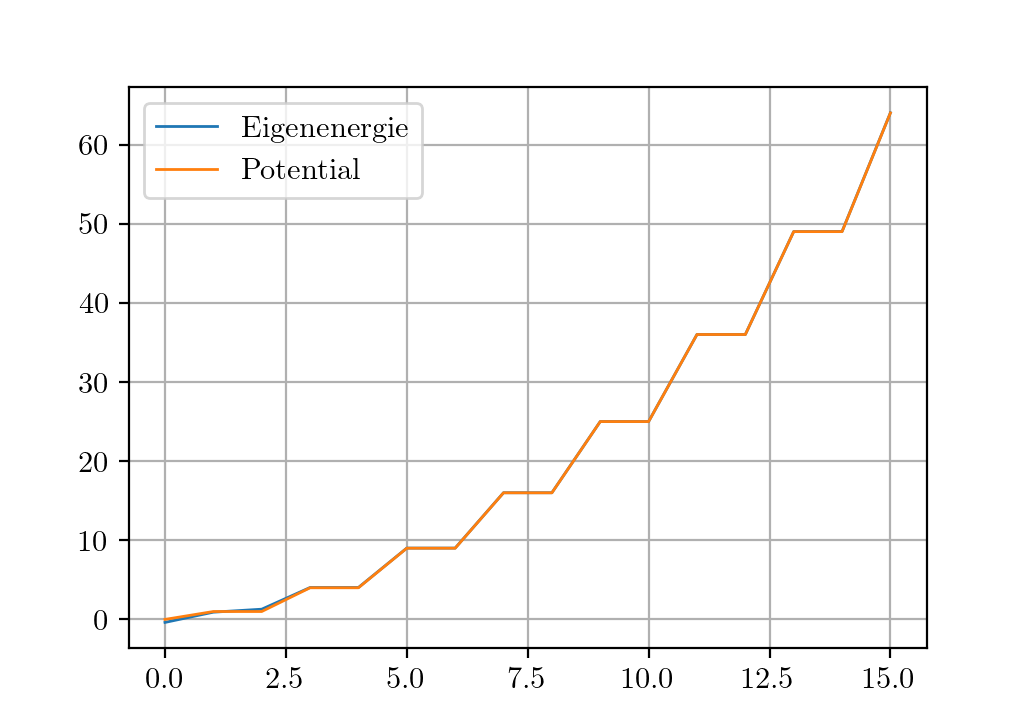

In [2]:
Om=1
M=2**4
mvec=np.arange(-M//2,M//2)

TM=-Om**2/2.0e0*( 
    np.diag(np.ones((M-1,)),1)-0.0e0*np.diag(np.ones((M,)),0)+np.diag(np.ones((M-1,)),-1))

pot=mvec**2
VM=np.diag(pot,0)

HM=TM+VM

eigenValues,eigenVectors=np.linalg.eig(HM)

idx = eigenValues.argsort()   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors=eigenVectors*np.sign(eigenVectors[M//2-1,:])

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(mvec,eigenVectors[:,0:5],lw=1,label=r"")
ax.set_xlabel(r'$m$',fontsize='large')
#ax.set_ylabel(r'$|T|^2$',fontsize='large',rotation='horizontal',labelpad=20)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
# ax.vlines([Omres-Gammares/2.0, Omres+Gammares/2.0], 0, 1, transform=ax.get_xaxis_transform(), colors='g',linestyles='dotted')

#ax.hlines( [Ires/2],0, 1,transform=ax.get_yaxis_transform(), 
#          colors='g',linestyles='dotted',
#          label=r'$|T_r(\tilde \kappa=0.2)|^2/2$')
# for the exact FWHM 
# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
#ax.axvspan(OmresmiHWHM, OmresplHWHM, facecolor='#2ca02c', alpha=0.1)

ax.grid()
#ax.legend(loc='upper right')
fig.tight_layout()

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(eigenValues,lw=1,label=r"Eigenenergie")

idx=pot.argsort()
potsort=pot[idx]
ax.plot(potsort,lw=1,label=r"Potential")
ax.legend(loc='upper left')
ax.grid()
#plt.savefig('pictures/resonance_spectrum.pdf', dpi=300, facecolor='w', edgecolor='w',
#            orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
#plt.savefig('pictures/resonance_spectrum.pgf', dpi=300, facecolor='w', edgecolor='w',
#          orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)



In [3]:
idx=pot.argsort()
pot[idx]

array([ 0,  1,  1,  4,  4,  9,  9, 16, 16, 25, 25, 36, 36, 49, 49, 64],
      dtype=int32)

Dann für tiefe Potentiale $\Omega=100$

<IPython.core.display.Javascript object>


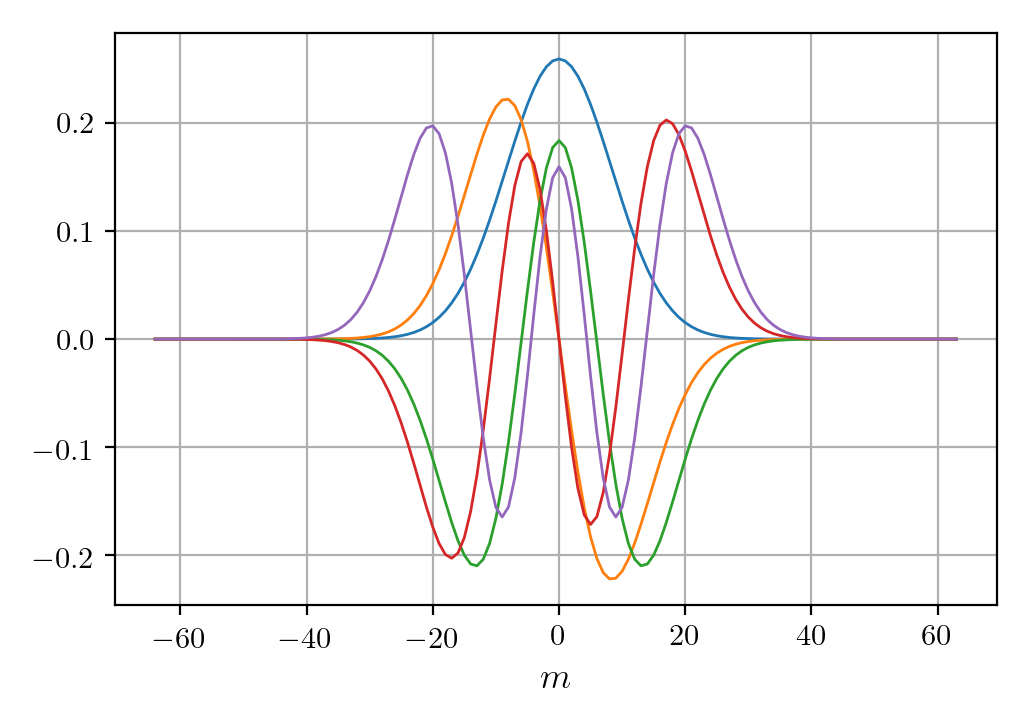

<IPython.core.display.Javascript object>


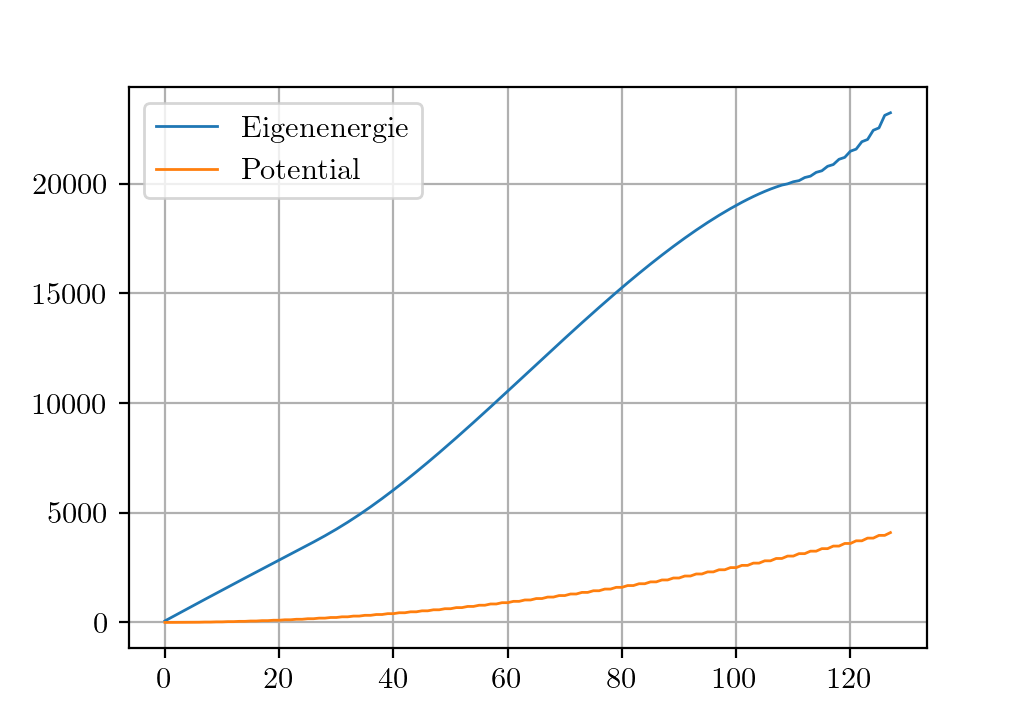

In [4]:
Om=100
M=2**7
mvec=np.arange(-M//2,M//2)

TM=-Om**2/2.0e0*( 
    np.diag(np.ones((M-1,)),1)-2.0e0*np.diag(np.ones((M,)),0)+np.diag(np.ones((M-1,)),-1))

pot=mvec**2
VM=np.diag(pot,0)

HM=TM+VM

eigenValues,eigenVectors=np.linalg.eig(HM)

idx = eigenValues.argsort()   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors=eigenVectors*np.sign(eigenVectors[M//2-1,:])

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(mvec,eigenVectors[:,0:5],lw=1,label=r"")
ax.set_xlabel(r'$m$',fontsize='large')
#ax.set_ylabel(r'$|T|^2$',fontsize='large',rotation='horizontal',labelpad=20)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
# ax.vlines([Omres-Gammares/2.0, Omres+Gammares/2.0], 0, 1, transform=ax.get_xaxis_transform(), colors='g',linestyles='dotted')

#ax.hlines( [Ires/2],0, 1,transform=ax.get_yaxis_transform(), 
#          colors='g',linestyles='dotted',
#          label=r'$|T_r(\tilde \kappa=0.2)|^2/2$')
# for the exact FWHM 
# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
#ax.axvspan(OmresmiHWHM, OmresplHWHM, facecolor='#2ca02c', alpha=0.1)

ax.grid()
#ax.legend(loc='upper right')
fig.tight_layout()

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(eigenValues,lw=1,label=r"Eigenenergie")

idx=pot.argsort()
potsort=pot[idx]
ax.plot(potsort,lw=1,label=r"Potential")
ax.legend(loc='upper left')
ax.grid()
#plt.savefig('pictures/resonance_spectrum.pdf', dpi=300, facecolor='w', edgecolor='w',
#            orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
#plt.savefig('pictures/resonance_spectrum.pgf', dpi=300, facecolor='w', edgecolor='w',
#          orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)



<IPython.core.display.Javascript object>


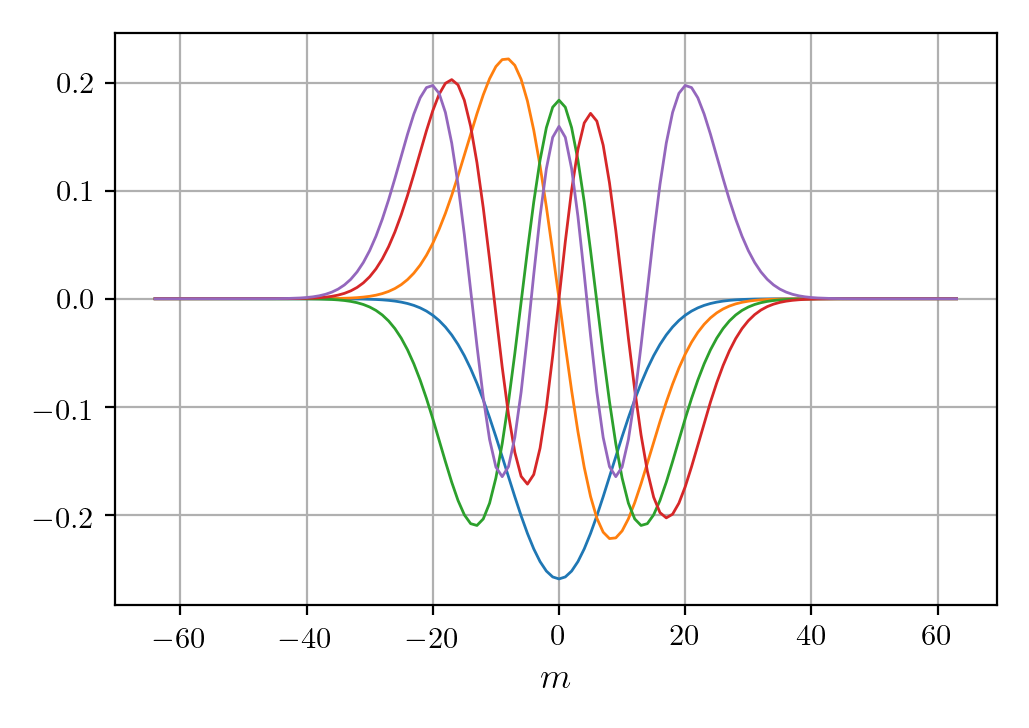

<IPython.core.display.Javascript object>


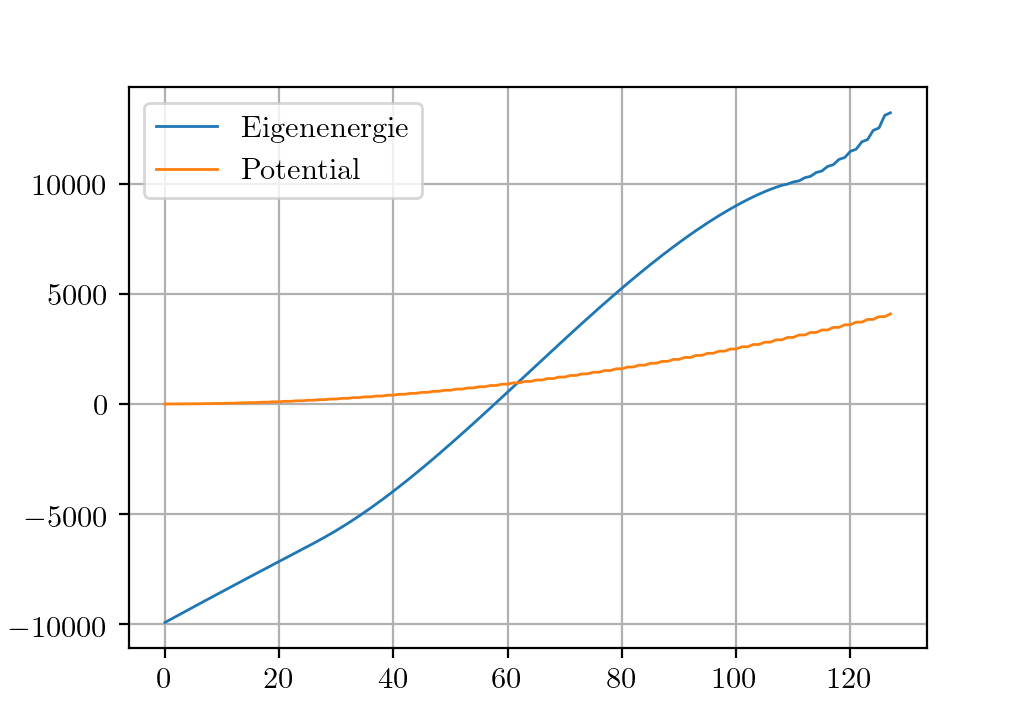

In [5]:
Om=100
M=2**7
mvec=np.arange(-M//2,M//2)

TM=-Om**2/2.0e0*( 
    np.diag(np.ones((M-1,)),1)-0.0e0*np.diag(np.ones((M,)),0)+np.diag(np.ones((M-1,)),-1))

pot=mvec**2
VM=np.diag(pot,0)

HM=TM+VM

eigenValues,eigenVectors=np.linalg.eig(HM)

idx = eigenValues.argsort()   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(mvec,eigenVectors[:,0:5],lw=1,label=r"")
ax.set_xlabel(r'$m$',fontsize='large')
#ax.set_ylabel(r'$|T|^2$',fontsize='large',rotation='horizontal',labelpad=20)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
# ax.vlines([Omres-Gammares/2.0, Omres+Gammares/2.0], 0, 1, transform=ax.get_xaxis_transform(), colors='g',linestyles='dotted')

#ax.hlines( [Ires/2],0, 1,transform=ax.get_yaxis_transform(), 
#          colors='g',linestyles='dotted',
#          label=r'$|T_r(\tilde \kappa=0.2)|^2/2$')
# for the exact FWHM 
# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
#ax.axvspan(OmresmiHWHM, OmresplHWHM, facecolor='#2ca02c', alpha=0.1)

ax.grid()
#ax.legend(loc='upper right')
fig.tight_layout()

# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

ax.plot(eigenValues,lw=1,label=r"Eigenenergie")
idx=pot.argsort()
potsort=pot[idx]
ax.plot(potsort,lw=1,label=r"Potential")
ax.legend(loc='upper left')
ax.grid()
#plt.savefig('pictures/resonance_spectrum.pdf', dpi=300, facecolor='w', edgecolor='w',
#            orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
#plt.savefig('pictures/resonance_spectrum.pgf', dpi=300, facecolor='w', edgecolor='w',
#          orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)

